In [2]:
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

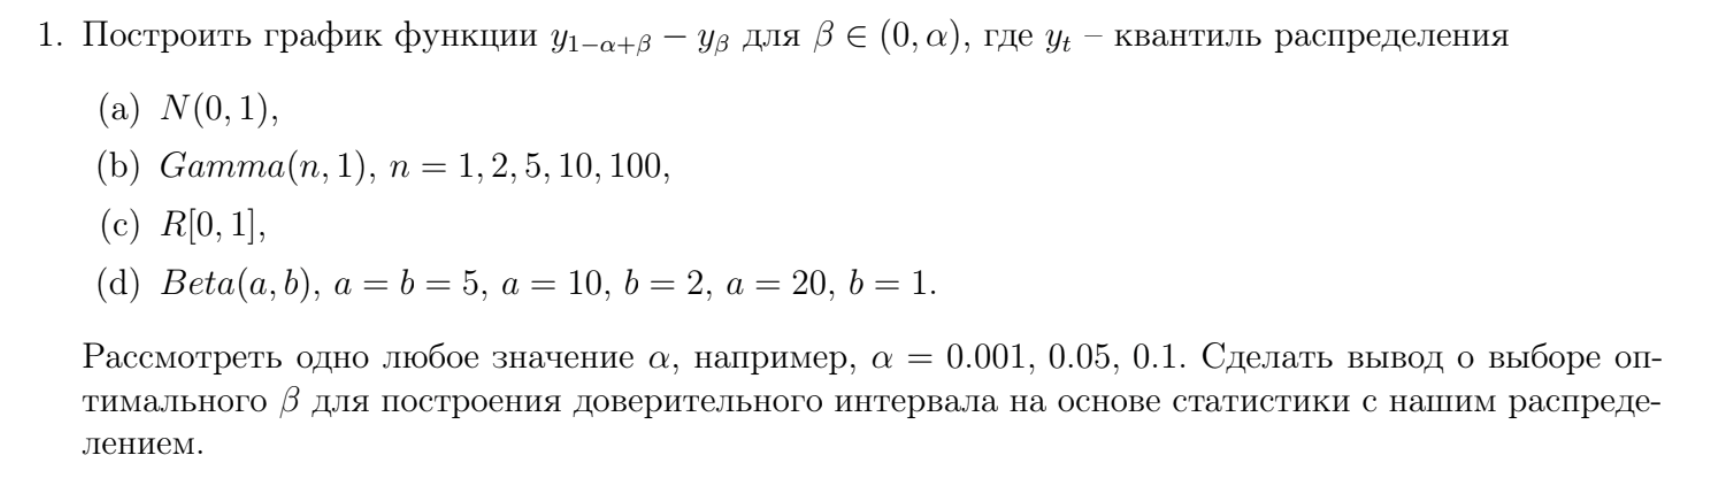

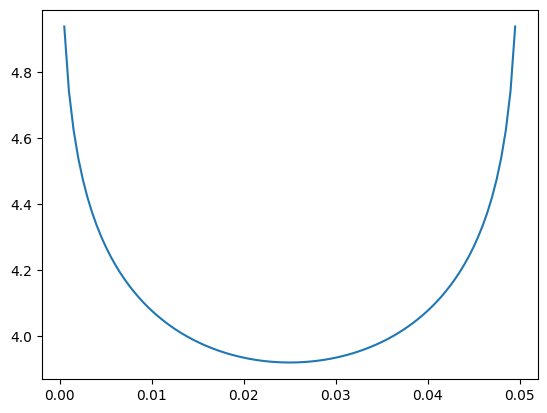

In [ ]:
alpha = 0.05
def func(alpha:float, beta: float, dist:sts.rv_continuous):
    res = dist.ppf(1-alpha+beta) - dist.ppf(beta)
    return res
fix,ax = plt.subplots()
x = np.linspace(0, alpha, 100)
ax.plot(x, func(alpha, x, sts.norm))
# график - парабола. поскольку длина нам нужна наименьшая -> выбираем бету из вершины параболы, т.е alpha/2

0.0
0.00101010101010101
0.00808080808080808
0.012626262626262626
0.021212121212121213


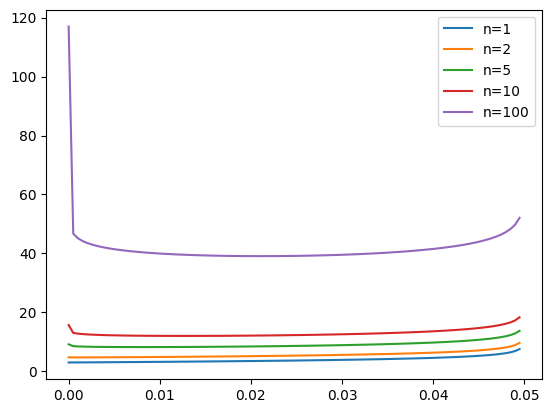

In [ ]:
fix,ax = plt.subplots()
def plot_gamma(n:int):
    ax.plot(x, func(alpha, x, sts.gamma(n,1)), label="n=%d"%n)
    beta_choice = np.argmin([func(alpha, m, sts.gamma(n,1)) for m in x])
    print(x[beta_choice])
x = np.linspace(0, alpha, 100)
plot_gamma(1)
plot_gamma(2)
plot_gamma(5)
plot_gamma(10)
plot_gamma(100)
plt.legend()

0.0


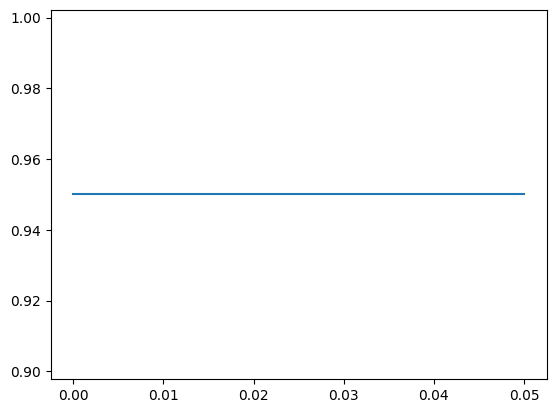

In [ ]:
fix,ax = plt.subplots()
x = np.linspace(0, alpha, 100)
ax.plot(x, func(alpha, x, sts.uniform))
beta_choice = np.argmin([func(alpha, m, sts.uniform) for m in x])
print(x[beta_choice])
#тут без разницы какую бету выбирать, площадь всегда одинаковая.

0.024747474747474747
0.047979797979797977
0.05


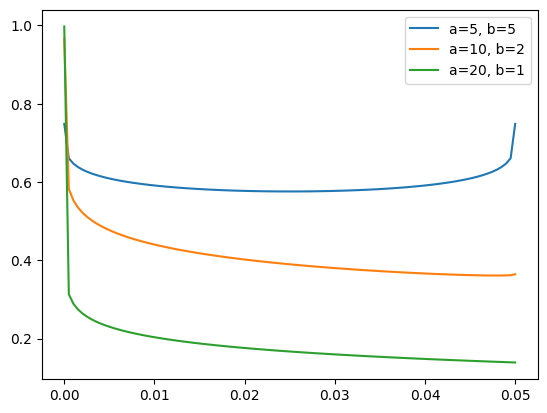

In [ ]:
fix,ax = plt.subplots()
def plot_beta(a:int, b:int):
    ax.plot(x, func(alpha, x, sts.beta(a,b)), label="a=%d, b=%d"%(a,b))
    beta_choice = np.argmin([func(alpha, m, sts.beta(a,b)) for m in x])
    print(x[beta_choice])
x = np.linspace(0, alpha, 100)
plot_beta(5,5)
plot_beta(10,2)
plot_beta(20,1)
plt.legend()
#аргументы для минимальности интервала выведены принтом

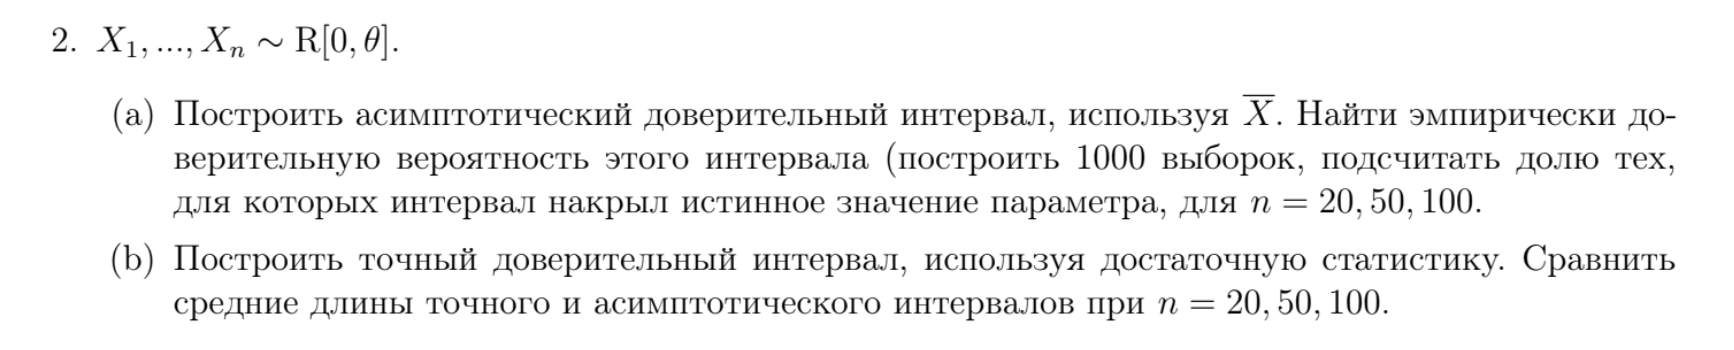

In [ ]:
alpha = 0.05
def task2(n:int,k:int, theta:float):
    rvsUni = sts.uniform(loc = 0, scale = theta).rvs
    data = sc.sparse.random(k,n, density=1, data_rvs = rvsUni).toarray()
    MeanSample = []
    MeanSquared = []
    variance = []
    border_left = []
    border_right = []
    border_left_precise = []
    border_right_precise = []
    for i in range (k):
        MeanSample.append(np.mean(data[i][:]))
        MeanSquared.append(np.mean([x**2 for x in data[i][:]]))
        variance.append(MeanSample[i] * 2 / np.sqrt(3))
        border_left.append(2*MeanSample[i] - 1/np.sqrt(n) * 2 * variance[i] * sts.norm.ppf(1 - alpha/2))
        border_right.append(2*MeanSample[i] - 1/np.sqrt(n) * 2 * variance[i] * sts.norm.ppf(alpha/2))
        border_left_precise.append(np.max(data[i][:]))
        border_right_precise.append(np.max(data[i][:]) * np.power(alpha, -1/n))
    counter = 0
    border_left = np.array(border_left)
    border_right = np.array(border_right)
    border_left_precise = np.array(border_left_precise)
    border_right_precise = np.array(border_right_precise)
    for i in range (k):
        if (border_left[i] <= theta <= border_right[i]):
            counter+=1
        else:continue
    print("Доля: ", counter/k)
    print("Средняя длина асимптотического интервала: ", np.mean(border_right - border_left))
    print("Средняя длина точного интервала: ", np.mean(border_right_precise - border_left_precise))
    print("")

task2(20,1000,1)
task2(50,1000,1)
task2(100,1000,1)

Доля:  0.995
Средняя длина асимптотического интервала:  1.0139759067360836
Средняя длина точного интервала:  0.15391814128378434

Доля:  0.999
Средняя длина асимптотического интервала:  0.640471131692761
Средняя длина точного интервала:  0.06052096854213015

Доля:  1.0
Средняя длина асимптотического интервала:  0.45300165585657953
Средняя длина точного интервала:  0.030110804910155477



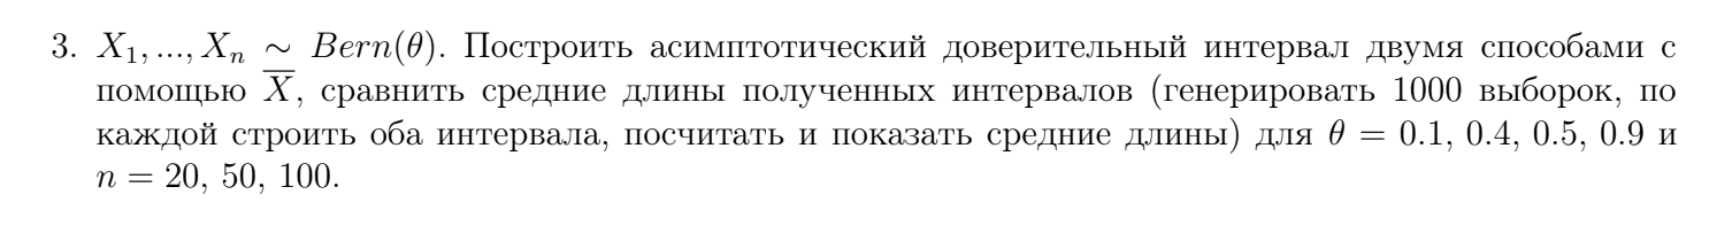

In [ ]:
alpha = 0.05
def task3(n:int,k:int, theta:float):
    rvsBern = sts.bernoulli(theta).rvs
    data = sc.sparse.random(k,n, density=1, data_rvs = rvsBern).toarray()
    border_left1 = []
    border_right1 = []
    border_left2 = []
    border_right2 = []
    for i in range (k):
      meani = np.mean(data[i][:])
      border_left1.append(meani - sts.norm.ppf(1 - alpha/2)*np.sqrt(meani*(1-meani)/n))
      border_right1.append(meani - sts.norm.ppf(alpha/2)*np.sqrt(meani*(1-meani)/n))
      border_left2.append(np.sin((np.arcsin(np.sqrt(meani)) - sts.norm.ppf(1 - alpha/2)/(2*np.sqrt(n)))**2))
      border_right2.append(meani - sts.norm.ppf(alpha/2)*np.sqrt(meani*(1-meani)/n))
    border_left1 = np.array(border_left1)
    border_right1 = np.array(border_right1)
    border_left2 = np.array(border_left2)
    border_right2 = np.array(border_right2)
    print("Средняя длина интервала 1: ", np.mean(border_right1 - border_left1))
    print("Средняя длина интервала 2: ", np.mean(border_right2 - border_left2))
    print("")

task3(20,1000,0.5)
task3(50,1000,0.5)
task3(100,1000,0.5)

Средняя длина интервала 1:  0.4270375275301844
Средняя длина интервала 2:  0.38925795081596903

Средняя длина интервала 1:  0.2743257382101116
Средняя длина интервала 2:  0.22787835016668653

Средняя длина интервала 1:  0.19502158172328302
Средняя длина интервала 2:  0.14162024371666082



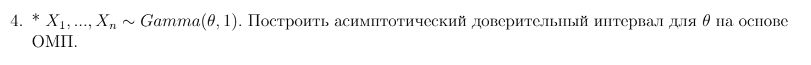

In [3]:
n = 1000
theta = 1
alpha = 0.05
def MLE(x:np.array, theta:float):
    a, loc, scale = sts.gamma.fit(x, method='mle', fscale=1, floc=0)
    return a
X = sts.gamma(a = theta, scale = 1).rvs(n)
mle_res = MLE(X, theta)
std = 1/np.sqrt(1/sc.special.gamma(theta) * sc.special.polygamma(1,theta))
right_border = mle_res - sts.norm.ppf(alpha/2, loc=0, scale=1)*std/np.sqrt(n)
left_border = mle_res - sts.norm.ppf(1 - alpha/2, loc=0, scale=1)*std/np.sqrt(n)
print(f"Asymptotic confidence interval: [{left_border}, {right_border}]")

Asymptotic confidence interval: [0.9678709025362479, 1.0645213433579257]


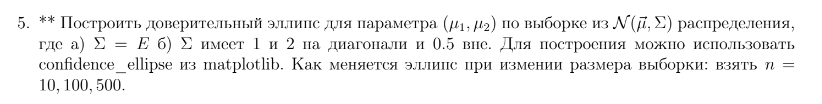

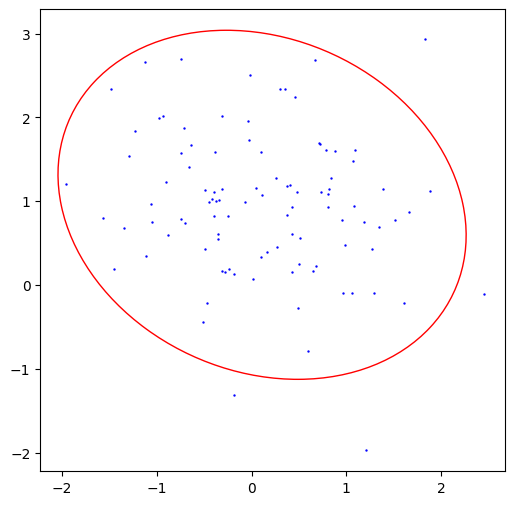

In [ ]:
mean = [0, 1]
cov_matrix = [[1, 0], [0, 1]]
num_samples = 100
data_points = np.random.multivariate_normal(mean, cov_matrix, num_samples)

plt.figure(figsize=(6,6))
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue', s = 0.5)

confidence_level = 0.95
df = 2
chi2_val = sts.chi2.ppf(confidence_level, df)
x = data_points[:, 0]
y = data_points[:, 1]
cov = np.cov(x, y)
cov_matrix_1 = [[cov[0][0] * chi2_val, cov[0][1]*chi2_val], [cov[1][0]*chi2_val, cov[1][1]*chi2_val]]
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_1)
major_axis_length = np.sqrt(abs(eigenvalues[0]))
minor_axis_length = np.sqrt(abs(eigenvalues[1]))
angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))

ellipse = plt.matplotlib.patches.Ellipse([np.mean(x), np.mean(y)], width= 2 * major_axis_length, height= 2 * minor_axis_length, angle=angle,
edgecolor='red', fill=False, linewidth=1)
plt.gca().add_patch(ellipse)

plt.show()

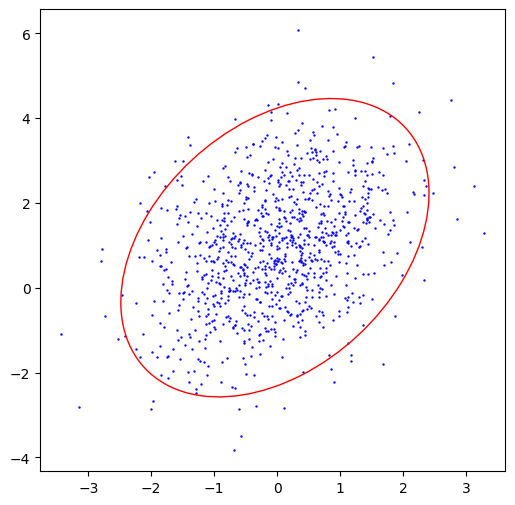

In [ ]:
mean = [0, 1]
cov_matrix = [[1, 0.5], [0.5, 2]]
num_samples = 1000
data_points = np.random.multivariate_normal(mean, cov_matrix, num_samples)

plt.figure(figsize=(6,6))
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue', s = 0.5)

confidence_level = 0.95
df = 2
chi2_val = sts.chi2.ppf(confidence_level, df)
x = data_points[:, 0]
y = data_points[:, 1]
cov = np.cov(x, y)
cov_matrix_1 = [[cov[0][0] * chi2_val, cov[0][1]*chi2_val], [cov[1][0]*chi2_val, cov[1][1]*chi2_val]]
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_1)
major_axis_length = np.sqrt(abs(eigenvalues[0]))
minor_axis_length = np.sqrt(abs(eigenvalues[1]))
angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))

ellipse = plt.matplotlib.patches.Ellipse([np.mean(x), np.mean(y)], width= 2 * major_axis_length, height= 2 * minor_axis_length, angle=angle,
edgecolor='red', fill=False, linewidth=1)
plt.gca().add_patch(ellipse)

plt.show()